<a href="https://colab.research.google.com/github/manveethjain8/Machine-Learning/blob/main/Lasso_and_Ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [12]:
df = pd.read_csv(r"emissions.csv")
df

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2015,Acura,ILX,Compact,2.0,4,AS5,Z,9.7,6.7,8.3,34,191,NaN,NaN
1,2015,Acura,ILX,Compact,2.4,4,M6,Z,10.8,7.4,9.3,30,214,NaN,NaN
2,2015,Acura,ILX Hybrid,Compact,1.5,4,AV7,Z,6.0,6.1,6.1,46,140,NaN,NaN
3,2015,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,NaN,NaN
4,2015,Acura,RDX AWD,Sport utility vehicle: Small,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10053,2024,Volvo,V60 CC B5 AWD,Station wagon: Small,2.0,4,AS8,Z,10.0,7.5,8.9,32,207,5.0,5.0
10054,2024,Volvo,V90 CC B6 AWD,Station wagon: Mid-size,2.0,4,AS8,Z,10.7,8.1,9.5,30,223,5.0,7.0
10055,2024,Volvo,XC40 B5 AWD,Sport utility vehicle: Small,2.0,4,AS8,Z,9.9,7.8,9.0,31,210,5.0,5.0
10056,2024,Volvo,XC60 B5 AWD,Sport utility vehicle: Small,2.0,4,AS8,Z,10.6,8.3,9.6,29,226,5.0,5.0


In [13]:
X = df.drop(columns=['CO2 emissions (g/km)', 'Make', 'Model', 'Combined (mpg)'])
y = df['CO2 emissions (g/km)']
X


,Model year,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),CO2 rating,Smog rating
0,2015,Compact,2.0,4,AS5,Z,9.7,6.7,8.3,NaN,NaN
1,2015,Compact,2.4,4,M6,Z,10.8,7.4,9.3,NaN,NaN
2,2015,Compact,1.5,4,AV7,Z,6.0,6.1,6.1,NaN,NaN
3,2015,Sport utility vehicle: Small,3.5,6,AS6,Z,12.7,9.1,11.1,NaN,NaN
4,2015,Sport utility vehicle: Small,3.5,6,AS6,Z,12.1,8.7,10.6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10053,2024,Station wagon: Small,2.0,4,AS8,Z,10.0,7.5,8.9,5.0,5.0
10054,2024,Station wagon: Mid-size,2.0,4,AS8,Z,10.7,8.1,9.5,5.0,7.0
10055,2024,Sport utility vehicle: Small,2.0,4,AS8,Z,9.9,7.8,9.0,5.0,5.0
10056,2024,Sport utility vehicle: Small,2.0,4,AS8,Z,10.6,8.3,9.6,5.0,5.0


In [14]:
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['int64','float64']).columns.tolist()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Lasso Regression

In [20]:

pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encode', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_columns),

        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean'))
        ]), numerical_columns)
    ])),

    ('regressor', Lasso())
])

In [21]:
pipeline.fit(X_train, y_train)

print("Train MSE:", mean_squared_error(y_train, pipeline.predict(X_train)))
print("Train R2 :", r2_score(y_train, pipeline.predict(X_train)))


Train MSE: 88.98349560250534
Train R2 : 0.9758204630025429


In [ ]:
y_pred = pipeline.predict(X_test)
print(f"Test MSE: {mean_squared_error(y_test, y_pred)}")
print(f"Test R2: {r2_score(y_test, y_pred)}")

Test MSE: 89.00979841455126
Test R2: 0.9741222557889685


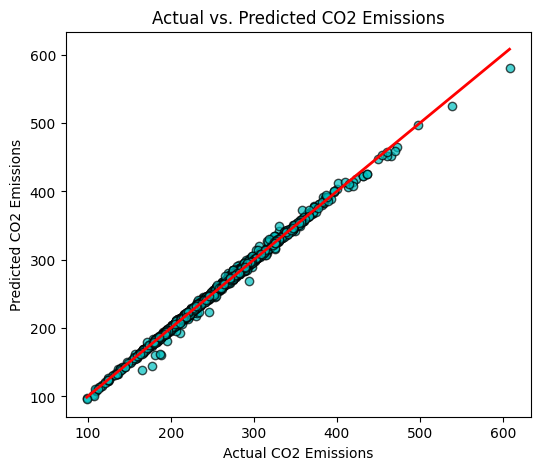

In [28]:
y_pred = pipeline.predict(X_test)
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, c='c', edgecolors='black', alpha=0.7)
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), lw=2, c='r')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs. Predicted CO2 Emissions')
plt.show()

In [24]:
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_columns),
        
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean'))
        ]), numerical_columns)
    ])),
    
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    
    ('regressor', Lasso(max_iter=5000))
])

In [25]:
pipeline.fit(X_train, y_train)
print(f"Train MSE: {mean_squared_error(y_train, pipeline.predict(X_train))}")
print(f"Train R2: {r2_score(y_train, pipeline.predict(X_train))}")

Train MSE: 9.646297518705818
Train R2: 0.9973788059666262


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.174e+04, tolerance: 2.961e+03
  model = cd_fast.sparse_enet_coordinate_descent(


In [29]:
y_pred = pipeline.predict(X_test)
print(f"Test MSE: {mean_squared_error(y_test, y_pred)}")
print(f"Test R2: {r2_score(y_test, y_pred)}")

Test MSE: 9.29339580578173
Test R2: 0.9973955842329825


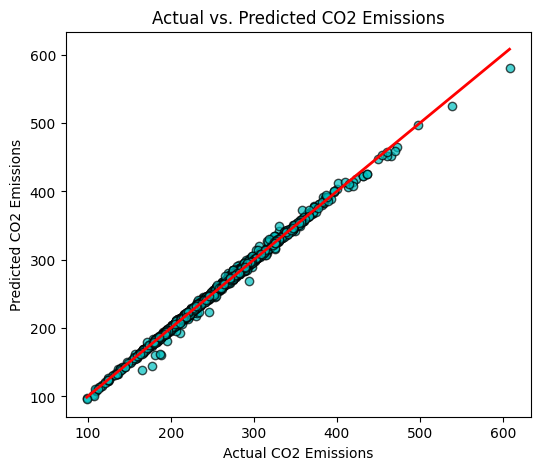

In [30]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, c='c', edgecolors='black', alpha=0.7)
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), lw=2, c='r')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs. Predicted CO2 Emissions')
plt.show()

Ridge Regression


In [31]:
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_columns),
        
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean'))
        ]), numerical_columns)
    ])),
    
    ('regressor', Ridge())
])

In [32]:
pipeline.fit(X_train, y_train)
print(f"Train MSE: {mean_squared_error(y_train, pipeline.predict(X_train))}")
print(f"Train R2: {r2_score(y_train, pipeline.predict(X_train))}")

Train MSE: 15.049023270461138
Train R2: 0.9959107201568123


In [33]:
y_pred = pipeline.predict(X_test)
print(f"Test MSE: {mean_squared_error(y_test, y_pred)}")
print(f"Test R2: {r2_score(y_test, y_pred)}")

Test MSE: 12.818572184633554
Test R2: 0.9964076757079966


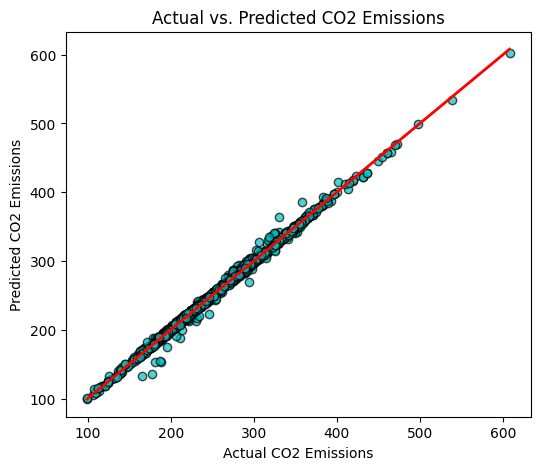

In [34]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, c='c', edgecolors='black', alpha=0.7)
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), lw=2, c='r')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs. Predicted CO2 Emissions')
plt.show()

In [37]:
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_columns),
        
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean'))
        ]), numerical_columns)
    ])),
    
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    
    ('regressor', Lasso(max_iter=5000))
])

In [38]:
pipeline.fit(X_train, y_train)
print(f"Train MSE: {mean_squared_error(y_train, pipeline.predict(X_train))}")
print(f"Train R2: {r2_score(y_train, pipeline.predict(X_train))}")

Train MSE: 9.646297518705818
Train R2: 0.9973788059666262


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.174e+04, tolerance: 2.961e+03
  model = cd_fast.sparse_enet_coordinate_descent(


In [39]:
y_pred = pipeline.predict(X_test)
print(f"Test MSE: {mean_squared_error(y_test, y_pred)}")
print(f"Test R2: {r2_score(y_test, y_pred)}")

Test MSE: 9.29339580578173
Test R2: 0.9973955842329825


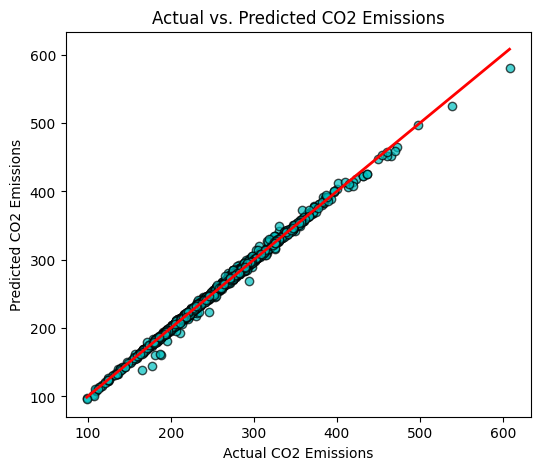

In [40]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, c='c', edgecolors='black', alpha=0.7)
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), lw=2, c='r')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs. Predicted CO2 Emissions')
plt.show()